In [1]:
import torch

import data
from utils import plot_image, delete_variables
from training import train
from transformers import ClassicalVisionTransformer, ClassicalTransformer

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Note that the metrics could be improved by training for more epochs, hyperparameter optimization, data augmentation and preprocessing.

## MNIST

100%|██████████| 9912422/9912422 [00:03<00:00, 2628520.19it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 4815188.37it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 2773040.70it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 35542031.28it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



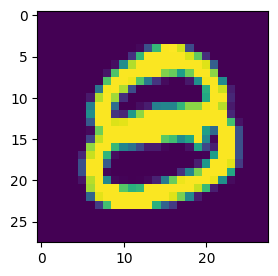

Image size: 28x28, Number of channels: 1


In [3]:
mnist_train_dataloader, mnist_valid_dataloader = data.get_mnist_dataloaders(batch_size=16)
plot_image(next(iter(mnist_train_dataloader))[0][0].permute(1,2,0).numpy())
img_size = mnist_train_dataloader.dataset[0][0].shape[1]
num_channels = mnist_train_dataloader.dataset[0][0].shape[0]
print(f"Image size: {img_size}x{img_size}, Number of channels: {num_channels}")

In [4]:
model = ClassicalVisionTransformer(img_size=28, num_channels=1, num_classes=10, patch_size=14, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32)
train(model, mnist_train_dataloader, mnist_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (38.78s): Loss = 0.1574, Accuracy = 95.41%, AUC = 99.80%
Epoch 2/15 (74.73s): Loss = 0.1309, Accuracy = 96.03%, AUC = 99.87%
Epoch 3/15 (108.25s): Loss = 0.1016, Accuracy = 96.94%, AUC = 99.92%
Epoch 4/15 (145.91s): Loss = 0.0949, Accuracy = 96.98%, AUC = 99.93%
Epoch 5/15 (180.75s): Loss = 0.0832, Accuracy = 97.52%, AUC = 99.94%
Epoch 6/15 (219.74s): Loss = 0.0879, Accuracy = 97.45%, AUC = 99.94%
Epoch 7/15 (257.24s): Loss = 0.0854, Accuracy = 97.38%, AUC = 99.94%
Epoch 8/15 (292.61s): Loss = 0.0752, Accuracy = 97.79%, AUC = 99.96%
Epoch 9/15 (328.95s): Loss = 0.0698, Accuracy = 97.84%, AUC = 99.96%
Epoch 10/15 (363.71s): Loss = 0.0716, Accuracy = 97.89%, AUC = 99.96%
Epoch 11/15 (401.03s): Loss = 0.0692, Accuracy = 98.10%, AUC = 99.96%
Epoch 12/15 (437.42s): Loss = 0.0750, Accuracy = 97.91%, AUC = 99.96%
Epoch 13/15 (474.42s): Loss = 0.0651, Accuracy = 98.09%, AUC = 99.97%
Epoch 14/15 (512.25s): Loss = 0.0738, Accuracy = 97.84%, AUC = 99.97%
Epoch 15/15 (549.60s): Loss = 0

In [5]:
model = ClassicalVisionTransformer(img_size=28, num_channels=1, num_classes=10, patch_size=14, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3)
train(model, mnist_train_dataloader, mnist_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (35.55s): Loss = 0.9351, Accuracy = 71.49%, AUC = 94.78%
Epoch 2/15 (71.33s): Loss = 0.7254, Accuracy = 78.75%, AUC = 96.64%
Epoch 3/15 (106.41s): Loss = 0.6405, Accuracy = 82.08%, AUC = 97.23%
Epoch 4/15 (142.28s): Loss = 0.5854, Accuracy = 84.04%, AUC = 97.62%
Epoch 5/15 (178.61s): Loss = 0.5528, Accuracy = 84.49%, AUC = 97.84%
Epoch 6/15 (213.86s): Loss = 0.5236, Accuracy = 85.13%, AUC = 97.99%
Epoch 7/15 (250.83s): Loss = 0.4917, Accuracy = 86.42%, AUC = 98.20%
Epoch 8/15 (288.71s): Loss = 0.4653, Accuracy = 87.23%, AUC = 98.35%
Epoch 9/15 (326.97s): Loss = 0.4425, Accuracy = 87.87%, AUC = 98.50%
Epoch 10/15 (363.47s): Loss = 0.4315, Accuracy = 88.04%, AUC = 98.57%
Epoch 11/15 (402.36s): Loss = 0.4348, Accuracy = 88.11%, AUC = 98.54%
Epoch 12/15 (439.14s): Loss = 0.4256, Accuracy = 88.04%, AUC = 98.61%
Epoch 13/15 (476.21s): Loss = 0.4154, Accuracy = 88.27%, AUC = 98.64%
Epoch 14/15 (512.90s): Loss = 0.4100, Accuracy = 88.15%, AUC = 98.68%
Epoch 15/15 (549.25s): Loss = 0

In [7]:
delete_variables(model, mnist_train_dataloader, mnist_valid_dataloader)

## Electron-Photon

Downloading...
From (uriginal): https://drive.google.com/uc?id=1VAqGQaMS5jSWV8gTXw39Opz-fNMsDZ8e
From (redirected): https://drive.google.com/uc?id=1VAqGQaMS5jSWV8gTXw39Opz-fNMsDZ8e&confirm=t&uuid=7b565850-4456-4263-af19-1197bf364079
To: /home/salcc/Documents/GSoC/QuantumTransformers/data/electron-photon.tar.xz
100%|██████████| 186M/186M [01:19<00:00, 2.34MB/s] 


Extracting electron-photon.tar.xz to data...


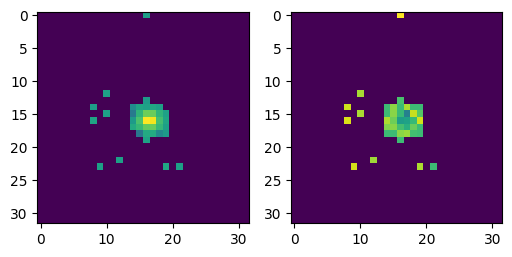

Image size: 32x32, Number of channels: 2


In [12]:
ep_train_dataloader, ep_valid_dataloader = data.get_electron_photon_dataloaders(batch_size=16)
plot_image(ep_train_dataloader.dataset[0][0], abs_log=True)
img_size = ep_train_dataloader.dataset[0][0].shape[0]
patch_size = 8
num_channels = ep_train_dataloader.dataset[0][0].shape[2]
num_classes = 2
print(f"Image size: {img_size}x{img_size}, Number of channels: {num_channels}")

In [13]:
model = ClassicalVisionTransformer(img_size=img_size, num_channels=num_channels, num_classes=num_classes, patch_size=patch_size, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32, channels_last=True)
train(model, ep_train_dataloader, ep_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (359.05s): Loss = 0.6259, Accuracy = 65.55%, AUC = 70.54%
Epoch 2/15 (728.68s): Loss = 0.6113, Accuracy = 67.05%, AUC = 73.58%
Epoch 3/15 (1060.80s): Loss = 0.5887, Accuracy = 69.45%, AUC = 75.43%
Epoch 4/15 (1403.56s): Loss = 0.5972, Accuracy = 68.68%, AUC = 75.43%
Epoch 5/15 (1747.19s): Loss = 0.5870, Accuracy = 69.46%, AUC = 75.61%
Epoch 6/15 (2086.80s): Loss = 0.5823, Accuracy = 69.88%, AUC = 76.22%
Epoch 7/15 (2407.37s): Loss = 0.5811, Accuracy = 69.92%, AUC = 76.50%
Epoch 8/15 (2744.97s): Loss = 0.5792, Accuracy = 70.21%, AUC = 76.44%
Epoch 9/15 (3079.20s): Loss = 0.5739, Accuracy = 70.93%, AUC = 77.13%
Epoch 10/15 (3406.91s): Loss = 0.5778, Accuracy = 70.55%, AUC = 76.66%
Epoch 11/15 (3751.01s): Loss = 0.5721, Accuracy = 70.71%, AUC = 77.25%
Epoch 12/15 (4118.18s): Loss = 0.5745, Accuracy = 70.34%, AUC = 77.08%
Epoch 13/15 (4478.49s): Loss = 0.5735, Accuracy = 70.54%, AUC = 77.08%
Epoch 14/15 (4827.22s): Loss = 0.5772, Accuracy = 70.32%, AUC = 76.80%
Epoch 15/15 (5176

In [14]:
model = ClassicalVisionTransformer(img_size=img_size, num_channels=num_channels, num_classes=num_classes, patch_size=patch_size, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3, channels_last=True)
train(model, ep_train_dataloader, ep_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (323.02s): Loss = 0.6226, Accuracy = 66.61%, AUC = 71.04%
Epoch 2/15 (647.37s): Loss = 0.6152, Accuracy = 67.10%, AUC = 72.41%
Epoch 3/15 (964.29s): Loss = 0.6083, Accuracy = 68.33%, AUC = 73.39%
Epoch 4/15 (1284.19s): Loss = 0.6026, Accuracy = 68.94%, AUC = 74.13%
Epoch 5/15 (1566.86s): Loss = 0.6032, Accuracy = 68.76%, AUC = 74.05%
Epoch 6/15 (1836.86s): Loss = 0.5998, Accuracy = 68.94%, AUC = 74.27%
Epoch 7/15 (2106.76s): Loss = 0.5979, Accuracy = 69.08%, AUC = 74.38%
Epoch 8/15 (2395.17s): Loss = 0.5990, Accuracy = 68.99%, AUC = 74.63%
Epoch 9/15 (2691.27s): Loss = 0.5943, Accuracy = 69.47%, AUC = 75.13%
Epoch 10/15 (2976.88s): Loss = 0.5920, Accuracy = 69.50%, AUC = 75.31%
Epoch 11/15 (3248.95s): Loss = 0.5899, Accuracy = 69.41%, AUC = 75.45%
Epoch 12/15 (3517.10s): Loss = 0.5912, Accuracy = 69.55%, AUC = 75.24%
Epoch 13/15 (3784.77s): Loss = 0.6016, Accuracy = 68.82%, AUC = 75.09%
Epoch 14/15 (4051.56s): Loss = 0.5908, Accuracy = 69.55%, AUC = 75.80%
Epoch 15/15 (4318.

In [15]:
delete_variables(model, ep_train_dataloader, ep_valid_dataloader)

## Quark-Gluon

Downloading...
From (uriginal): https://drive.google.com/uc?id=1G6HJKf3VtRSf7JLms2t1ofkYAldOKMls
From (redirected): https://drive.google.com/uc?id=1G6HJKf3VtRSf7JLms2t1ofkYAldOKMls&confirm=t&uuid=d03ee5c7-70a6-4471-8c47-65b88d64637a
To: /home/salcc/Documents/GSoC/QuantumTransformers/data/quark-gluon.tar.xz
100%|██████████| 289M/289M [02:05<00:00, 2.31MB/s] 


Extracting quark-gluon.tar.xz to data...


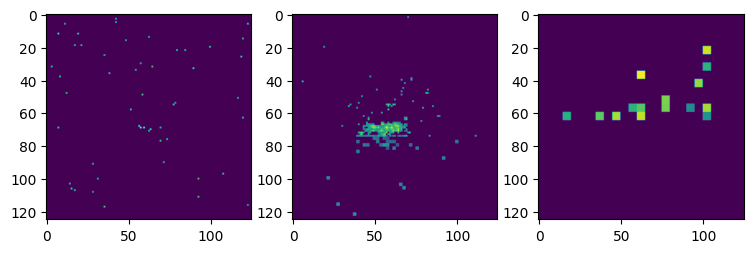

Image size: 125x125, Number of channels: 3


In [8]:
qgt_train_dataloader, qgt_valid_dataloader = data.get_quark_gluon_dataloaders(batch_size=16)
plot_image(qgt_train_dataloader.dataset[0][0], abs_log=True)
img_size = qgt_train_dataloader.dataset[0][0].shape[0]
patch_size = 10
num_channels = qgt_train_dataloader.dataset[0][0].shape[2]
num_classes = 2
print(f"Image size: {img_size}x{img_size}, Number of channels: {num_channels}")

In [9]:
model = ClassicalVisionTransformer(img_size=img_size, num_channels=num_channels, num_classes=num_classes, patch_size=patch_size, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32, channels_last=True)
train(model, qgt_train_dataloader, qgt_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (227.22s): Loss = 0.6062, Accuracy = 67.92%, AUC = 73.74%
Epoch 2/15 (440.08s): Loss = 0.5962, Accuracy = 68.56%, AUC = 75.19%
Epoch 3/15 (652.02s): Loss = 0.5860, Accuracy = 69.89%, AUC = 76.23%
Epoch 4/15 (874.11s): Loss = 0.5776, Accuracy = 70.38%, AUC = 77.13%
Epoch 5/15 (1091.13s): Loss = 0.5832, Accuracy = 69.85%, AUC = 77.18%
Epoch 6/15 (1311.47s): Loss = 0.5685, Accuracy = 71.38%, AUC = 77.82%
Epoch 7/15 (1532.44s): Loss = 0.5981, Accuracy = 68.54%, AUC = 77.71%
Epoch 8/15 (1758.90s): Loss = 0.5701, Accuracy = 71.40%, AUC = 78.08%
Epoch 9/15 (1983.85s): Loss = 0.5662, Accuracy = 71.54%, AUC = 78.31%
Epoch 10/15 (2203.72s): Loss = 0.5634, Accuracy = 71.58%, AUC = 78.34%
Epoch 11/15 (2430.22s): Loss = 0.5643, Accuracy = 71.70%, AUC = 78.32%
Epoch 12/15 (2646.21s): Loss = 0.5611, Accuracy = 72.21%, AUC = 78.63%
Epoch 13/15 (2873.15s): Loss = 0.5635, Accuracy = 71.83%, AUC = 78.81%
Epoch 14/15 (3097.52s): Loss = 0.5581, Accuracy = 72.25%, AUC = 78.86%
Epoch 15/15 (3317.9

In [10]:
model = ClassicalVisionTransformer(img_size=img_size, num_channels=num_channels, num_classes=num_classes, patch_size=patch_size, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3, channels_last=True)
train(model, qgt_train_dataloader, qgt_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (221.27s): Loss = 0.6372, Accuracy = 65.32%, AUC = 68.61%
Epoch 2/15 (445.38s): Loss = 0.6285, Accuracy = 65.65%, AUC = 70.49%
Epoch 3/15 (669.09s): Loss = 0.6161, Accuracy = 66.67%, AUC = 72.28%
Epoch 4/15 (886.24s): Loss = 0.6133, Accuracy = 67.03%, AUC = 72.59%
Epoch 5/15 (1105.25s): Loss = 0.6095, Accuracy = 67.37%, AUC = 72.96%
Epoch 6/15 (1325.63s): Loss = 0.6117, Accuracy = 67.76%, AUC = 73.03%
Epoch 7/15 (1540.35s): Loss = 0.6095, Accuracy = 66.77%, AUC = 73.14%
Epoch 8/15 (1758.47s): Loss = 0.6080, Accuracy = 67.48%, AUC = 73.15%
Epoch 9/15 (1991.78s): Loss = 0.6078, Accuracy = 67.50%, AUC = 73.18%
Epoch 10/15 (2205.69s): Loss = 0.6103, Accuracy = 67.01%, AUC = 73.24%
Epoch 11/15 (2413.53s): Loss = 0.6070, Accuracy = 67.17%, AUC = 73.43%
Epoch 12/15 (2617.40s): Loss = 0.6034, Accuracy = 67.75%, AUC = 73.72%
Epoch 13/15 (2821.34s): Loss = 0.6042, Accuracy = 67.68%, AUC = 74.00%
Epoch 14/15 (3035.20s): Loss = 0.5978, Accuracy = 68.17%, AUC = 74.64%
Epoch 15/15 (3252.7

In [11]:
delete_variables(model, qgt_train_dataloader, qgt_valid_dataloader)

## IMDB

In [16]:
(imdb_train_dataloader, imdb_valid_dataloader), vocab = data.get_imdb_dataloaders(batch_size=8)
print(imdb_train_dataloader.dataset[0][1])

I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, eve

In [17]:
model = ClassicalTransformer(num_tokens=len(vocab), num_classes=2, hidden_size=64, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=32)
train(model, imdb_train_dataloader, imdb_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (102.34s): Loss = 0.4655, Accuracy = 77.83%, AUC = 86.05%
Epoch 2/15 (205.63s): Loss = 0.3959, Accuracy = 82.43%, AUC = 90.53%
Epoch 3/15 (309.65s): Loss = 0.3650, Accuracy = 84.13%, AUC = 92.17%
Epoch 4/15 (412.87s): Loss = 0.3598, Accuracy = 84.78%, AUC = 92.81%
Epoch 5/15 (516.29s): Loss = 0.3760, Accuracy = 84.85%, AUC = 93.55%
Epoch 6/15 (620.56s): Loss = 0.3758, Accuracy = 85.50%, AUC = 93.74%
Epoch 7/15 (724.28s): Loss = 0.3634, Accuracy = 86.68%, AUC = 94.00%
Epoch 8/15 (828.05s): Loss = 0.4103, Accuracy = 84.17%, AUC = 93.95%
Epoch 9/15 (932.64s): Loss = 0.3897, Accuracy = 86.36%, AUC = 94.16%
Epoch 10/15 (1037.56s): Loss = 0.3978, Accuracy = 86.72%, AUC = 94.07%
Epoch 11/15 (1143.12s): Loss = 0.3904, Accuracy = 86.54%, AUC = 93.98%
Epoch 12/15 (1248.01s): Loss = 0.4386, Accuracy = 85.87%, AUC = 94.04%
Epoch 13/15 (1353.07s): Loss = 0.4477, Accuracy = 86.54%, AUC = 94.01%
Epoch 14/15 (1457.70s): Loss = 0.4562, Accuracy = 86.33%, AUC = 93.91%
Epoch 15/15 (1562.38s): 

In [18]:
model = ClassicalTransformer(num_tokens=len(vocab), num_classes=2, hidden_size=6, num_heads=2, num_transformer_blocks=4, mlp_hidden_size=3)
train(model, imdb_train_dataloader, imdb_valid_dataloader, learning_rate=0.0003, num_epochs=15, device=device)

Epoch 1/15 (99.26s): Loss = 0.6914, Accuracy = 52.44%, AUC = 55.54%
Epoch 2/15 (198.41s): Loss = 0.6226, Accuracy = 65.51%, AUC = 74.02%
Epoch 3/15 (297.60s): Loss = 0.5447, Accuracy = 72.77%, AUC = 80.61%
Epoch 4/15 (396.36s): Loss = 0.5659, Accuracy = 71.74%, AUC = 84.09%
Epoch 5/15 (495.43s): Loss = 0.6002, Accuracy = 71.09%, AUC = 86.36%
Epoch 6/15 (594.39s): Loss = 0.4884, Accuracy = 77.01%, AUC = 87.87%
Epoch 7/15 (694.38s): Loss = 0.4382, Accuracy = 80.58%, AUC = 89.13%
Epoch 8/15 (793.65s): Loss = 0.4899, Accuracy = 77.89%, AUC = 90.02%
Epoch 9/15 (892.66s): Loss = 0.3936, Accuracy = 82.99%, AUC = 90.90%
Epoch 10/15 (991.67s): Loss = 0.4131, Accuracy = 82.21%, AUC = 91.42%
Epoch 11/15 (1090.86s): Loss = 0.3830, Accuracy = 83.71%, AUC = 91.91%
Epoch 12/15 (1190.50s): Loss = 0.3884, Accuracy = 83.56%, AUC = 92.30%
Epoch 13/15 (1289.14s): Loss = 0.4021, Accuracy = 83.35%, AUC = 92.55%
Epoch 14/15 (1388.53s): Loss = 0.3963, Accuracy = 83.58%, AUC = 92.84%
Epoch 15/15 (1487.64s): Lo

In [19]:
delete_variables(model, imdb_train_dataloader, imdb_valid_dataloader)